In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#loading the agreements data

agreements = pd.read_csv(r'C:\Users\ambro\Documents\Polsky - Confidential\AgreementsData.csv')

In [4]:
agreements.head()

,Status,Status Date,Agreement Type,In or Out,Term Date,Agreement Term,Sign Date,First Commercial Sale Date,Field Of Use,Researchers,Division/Department,Investigators,Last Related Update
0,Active,3/14/2012,Non-Exclusive License - Tangible Property,Out,1/15/2032,30.0,3/14/2012,4/1/2002,"In Vitro research reagent only, specifically e...",NaN,"Biological Sciences Division (BSD), Medicine","Wonhwa Cho, Alan Leff, Maria Nilda Munoz",1/19/2023
1,Active,10/7/2014,Non-Exclusive License - Tangible Property,Out,6/16/2034,20.0,10/7/2014,12/31/2015,Commercial use of Licensed Products for use as...,NaN,"Ben May Institute for Cancer Research, Biologi...","Jeffrey Bluestone, David Lancki, Carol McShan,...",1/19/2023
2,Active,6/27/2011,Non-Exclusive License - Tangible Property,Out,6/23/2031,20.0,6/27/2011,NaN,The use of Licensed Materials in the performan...,NaN,"Biological Sciences Division (BSD), Medicine","Samuel Refetoff, Neal Scherberg",1/19/2023
3,Active,4/27/2012,Non-Exclusive License - Tangible Property,Out,4/17/2032,20.0,4/27/2012,8/16/2013,Territory means worldwide.,NaN,"Biological Sciences Division (BSD), Office of ...","Frank Collart, Eliezer Huberman, Michael Loken...",1/18/2023
4,Terminated,2/12/2015,Exclusive License - All Fields,Out,11/25/2034,20.0,2/12/2015,NaN,Therapeutics for cancer and copper-related hum...,NaN,"Chemistry, Comprehensive Cancer Center, Physic...","Chuan He, HuaLiang Jiang, Hong Liu, Cheng Luo,...",12/12/2022


In [5]:
#let's check for data cleanliness and quality

agreements.dtypes

Status                         object
Status Date                    object
Agreement Type                 object
In or Out                      object
Term Date                      object
Agreement Term                float64
Sign Date                      object
First Commercial Sale Date     object
Field Of Use                   object
Researchers                   float64
Division/Department            object
Investigators                  object
Last Related Update            object
dtype: object

In [68]:
#correcting data types

agreements['Status Date']=pd.to_datetime(agreements['Status Date'])
agreements['Term Date']=pd.to_datetime(agreements['Term Date'])
agreements['Sign Date']=pd.to_datetime(agreements['Sign Date'])
agreements['First Commercial Sale Date']=pd.to_datetime(agreements['First Commercial Sale Date'])
agreements['Last Related Update']=pd.to_datetime(agreements['Last Related Update'])

agreements['Status']=agreements['Status'].astype('string')
agreements['Agreement Type']=agreements['Agreement Type'].astype('string')
agreements['In or Out']=agreements['In or Out'].astype('string')
agreements['Field Of Use']=agreements['Field Of Use'].astype('string')
agreements['Division/Department']=agreements['Division/Department'].astype('string')
agreements['Investigators']=agreements['Investigators'].astype('string')


In [69]:
agreements.dtypes

Status                                string
Status Date                   datetime64[ns]
Agreement Type                        string
In or Out                             string
Term Date                     datetime64[ns]
Agreement Term                       float64
Sign Date                     datetime64[ns]
First Commercial Sale Date    datetime64[ns]
Field Of Use                          string
Researchers                          float64
Division/Department                   string
Investigators                         string
Last Related Update           datetime64[ns]
dtype: object

In [70]:
#let's check for missing data

agreements.isnull().sum()

Status                          0
Status Date                    60
Agreement Type                  0
In or Out                       0
Term Date                     276
Agreement Term                 16
Sign Date                     184
First Commercial Sale Date    463
Field Of Use                   38
Researchers                   513
Division/Department            74
Investigators                  23
Last Related Update             0
dtype: int64

<AxesSubplot: xlabel='Status', ylabel='Count'>

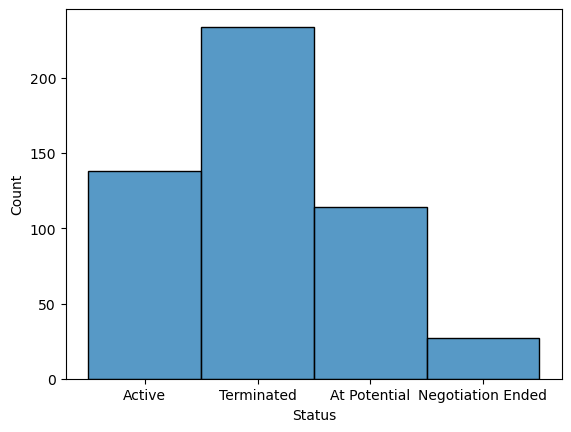

In [71]:
sns.histplot(agreements['Status'])

In [72]:
# before visualizing, I'll clean up Agreement Type

agreements['Agreement Type'].value_counts()

Exclusive License        252
Non-Exclusive License    219
Exclusive Option          34
Co-Exclusive License       5
Non-Exclusive Option       3
Name: Agreement Type, dtype: Int64

In [73]:
agreements.loc[agreements['Agreement Type']==
    'Exclusive License - All Fields','Agreement Type'] = 'Exclusive License'
agreements.loc[agreements['Agreement Type']==
    'Exclusive License - Field Limited','Agreement Type'] = 'Exclusive License'
agreements.loc[agreements['Agreement Type']==
    'Exclusive License - UCGo!','Agreement Type'] = 'Exclusive License'
agreements.loc[agreements['Agreement Type']==
    'Exclusive License - Tangible Property','Agreement Type'] = 'Exclusive License'

agreements.loc[agreements['Agreement Type']==
    'Non-Exclusive License - All Fields','Agreement Type'] = 'Non-Exclusive License'
agreements.loc[agreements['Agreement Type']==
    'Non-Exclusive License - Field Limited','Agreement Type'] = 'Non-Exclusive License'
agreements.loc[agreements['Agreement Type']==
    'Non-Exclusive License - Tangible Property','Agreement Type'] = 'Non-Exclusive License'

In [74]:
cols = agreements['Agreement Type'].value_counts().reset_index()
cols


,index,Agreement Type
0,Exclusive License,252
1,Non-Exclusive License,219
2,Exclusive Option,34
3,Co-Exclusive License,5
4,Non-Exclusive Option,3


In [75]:
active = agreements[agreements['Status']=='Active']
terminated = agreements[agreements['Status']=='Terminated']
atpotential = agreements[agreements['Status']=='At Potential']
negotiationended = agreements[agreements['Status']=='Negotiation Ended']

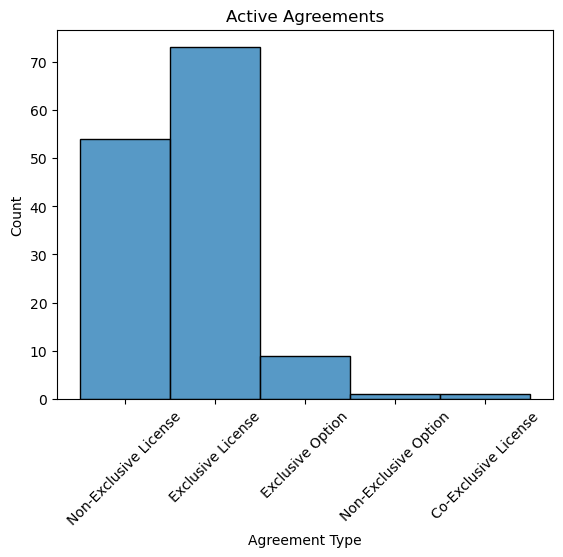

In [76]:
# data viz

sns.histplot(active['Agreement Type'])
plt.xticks(rotation=45)
plt.title('Active Agreements')
plt.show()

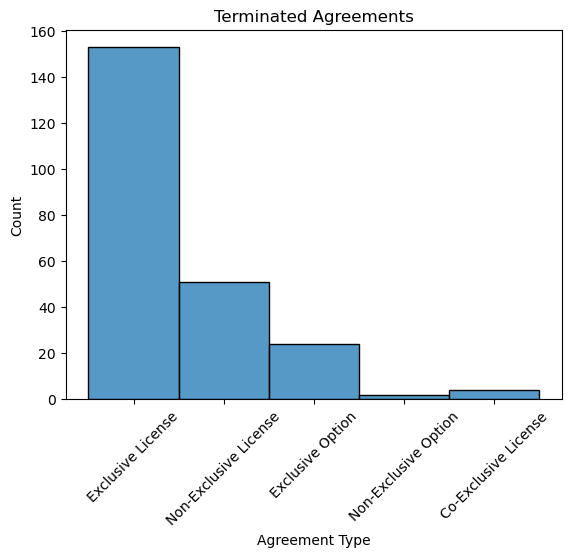

In [77]:
sns.histplot(terminated['Agreement Type'])
plt.xticks(rotation=45)
plt.title('Terminated Agreements')
plt.show()

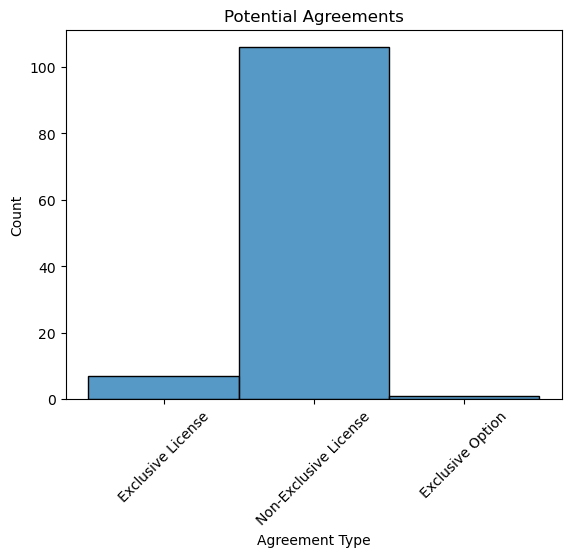

In [78]:
sns.histplot(atpotential['Agreement Type'])
plt.xticks(rotation=45)
plt.title('Potential Agreements')
plt.show()

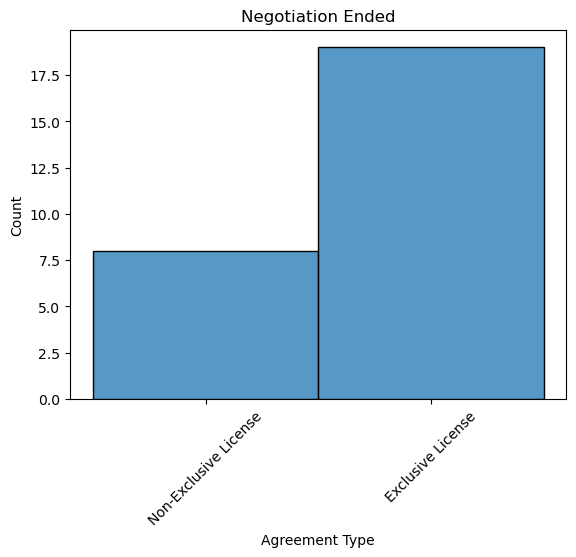

In [79]:
sns.histplot(negotiationended['Agreement Type'])
plt.xticks(rotation=45)
plt.title('Negotiation Ended')
plt.show()

<AxesSubplot: xlabel='Status', ylabel='count'>

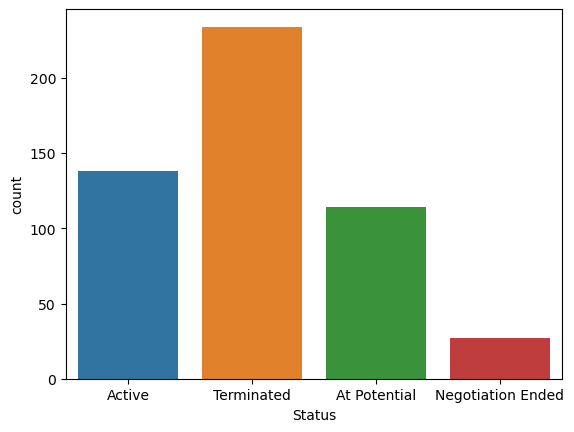

In [80]:
sns.countplot(x=agreements['Status'])

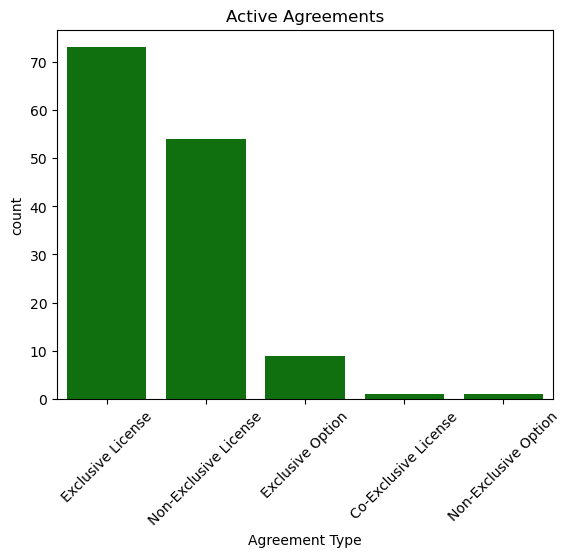

In [81]:
sns.countplot(x=active['Agreement Type'], order=cols['index'], color='green')
plt.xticks(rotation=45)
plt.title('Active Agreements')
plt.show()

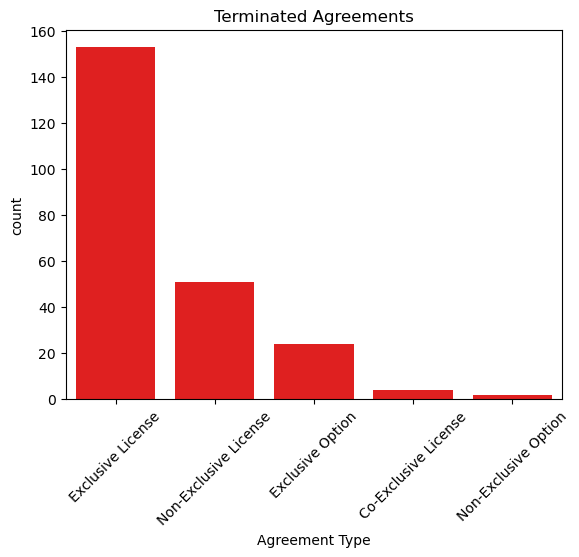

In [82]:
sns.countplot(x=terminated['Agreement Type'],order=cols['index'], color='red')
plt.xticks(rotation=45)
plt.title('Terminated Agreements')
plt.show()

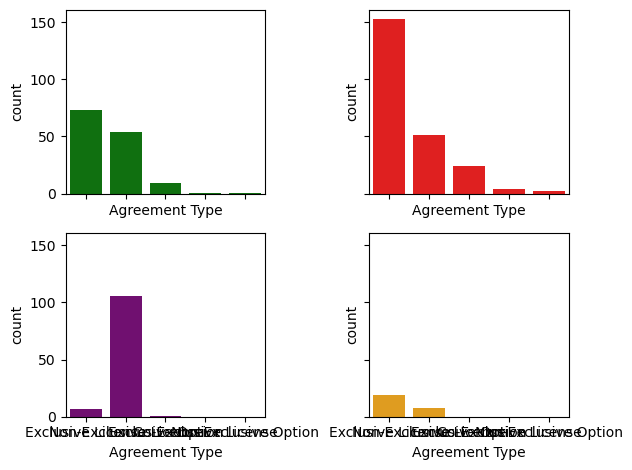

In [83]:
fig, axs = plt.subplots(2, 2,sharex='all', sharey='all')
sns.countplot(ax=axs[0,0],x=active['Agreement Type'], order=cols['index'], color='green')
sns.countplot(ax=axs[0,1],x=terminated['Agreement Type'],order=cols['index'], color='red')
sns.countplot(ax=axs[1,0],x=atpotential['Agreement Type'],order=cols['index'], color='purple')
sns.countplot(ax=axs[1,1],x=negotiationended['Agreement Type'],order=cols['index'], color='orange')

plt.tight_layout()

In [84]:
agreements.groupby(by=['Agreement Type']).mean()

C:\Users\ambro\AppData\Local\Temp\ipykernel_26100\4139602974.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


,Agreement Term,Researchers
Agreement Type,,
Co-Exclusive License,-0.400000,NaN
Exclusive License,0.061983,NaN
Exclusive Option,0.345588,NaN
Non-Exclusive License,2.769953,NaN
Non-Exclusive Option,0.333333,NaN


In [85]:
agreements.groupby(by=['Agreement Type']).median()

C:\Users\ambro\AppData\Local\Temp\ipykernel_26100\1425848480.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


,Agreement Term,Researchers
Agreement Type,,
Co-Exclusive License,0.0,NaN
Exclusive License,0.0,NaN
Exclusive Option,0.0,NaN
Non-Exclusive License,0.0,NaN
Non-Exclusive Option,0.5,NaN


In [86]:
grouped=agreements.groupby(by=['Agreement Type','Status']).size().unstack(fill_value=0).reset_index()

In [87]:
agreements.columns

Index(['Status', 'Status Date', 'Agreement Type', 'In or Out', 'Term Date',
       'Agreement Term', 'Sign Date', 'First Commercial Sale Date',
       'Field Of Use', 'Researchers', 'Division/Department', 'Investigators',
       'Last Related Update'],
      dtype='object')

In [88]:
term=agreements[agreements['Status']=='Terminated']

In [89]:
term.groupby(by='Agreement Type').count()['Status']

Agreement Type
Co-Exclusive License       4
Exclusive License        153
Exclusive Option          24
Non-Exclusive License     51
Non-Exclusive Option       2
Name: Status, dtype: int64

In [90]:
grouped=grouped.sort_values('Terminated')
grouped

Status,Agreement Type,Active,At Potential,Negotiation Ended,Terminated
4,Non-Exclusive Option,1,0,0,2
0,Co-Exclusive License,1,0,0,4
2,Exclusive Option,9,1,0,24
3,Non-Exclusive License,54,106,8,51
1,Exclusive License,73,7,19,153


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Non-Exclusive Option'),
  Text(1, 0, 'Co-Exclusive License'),
  Text(2, 0, 'Exclusive Option'),
  Text(3, 0, 'Non-Exclusive License'),
  Text(4, 0, 'Exclusive License')])

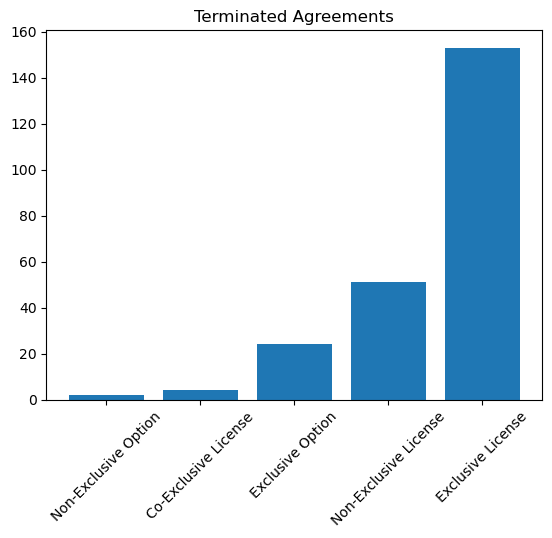

In [91]:
plt.bar(grouped['Agreement Type'],grouped['Terminated'])
plt.title('Terminated Agreements')
plt.xticks(rotation=45)

In [92]:
countsbydate=term.groupby('Sign Date').count().reset_index()


Text(0.5, 1.0, 'Terminated Agreements by Sign Date')

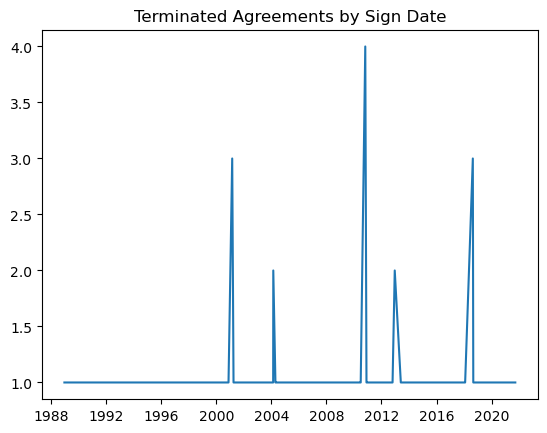

In [93]:
plt.plot(countsbydate['Sign Date'],countsbydate['Status'])
plt.title('Terminated Agreements by Sign Date')

In [94]:
countsbydate=term.groupby('Last Related Update').count().reset_index()

Text(0.5, 1.0, 'Terminated Agreements by Date of Last Related Update')

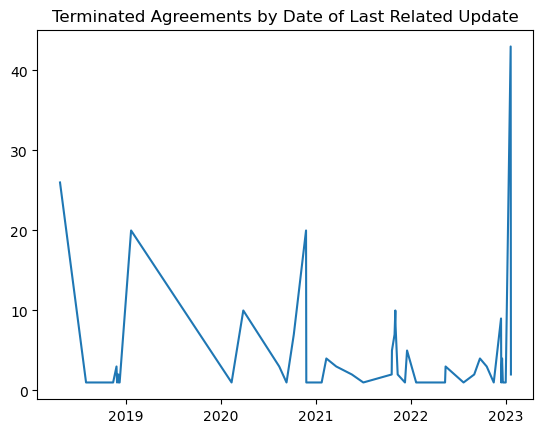

In [95]:
plt.plot(countsbydate['Last Related Update'],countsbydate['Status'])
plt.title('Terminated Agreements by Date of Last Related Update')


In [96]:
usage

,Status,Status Date,Agreement Type,In or Out,Term Date,Agreement Term,Sign Date,First Commercial Sale Date,Field Of Use,Researchers,Division/Department,Investigators,Last Related Update
4,Terminated,2015-02-12,Exclusive License,Out,2034-11-25,20.0,2015-02-12,NaT,Therapeutics for cancer and copper-related hum...,NaN,"Chemistry, Comprehensive Cancer Center, Physic...","Chuan He, HuaLiang Jiang, Hong Liu, Cheng Luo,...",2022-12-12
6,Terminated,2016-03-31,Non-Exclusive License,Out,2036-03-31,20.0,2016-04-12,NaT,Commercial sale of Licensed Products or Conjug...,NaN,"Ben May Institute for Cancer Research, Biologi...","Frank Fitch Estate, Wendy Havran",2023-01-18
32,Terminated,2020-06-12,Exclusive License,Out,2028-08-21,10.0,2018-08-22,NaT,Any Field - Software Agreement,NaN,"Computation Institute, Harris School of Public...","Rayid Ghani, Benedict Kuester",2022-04-19
43,Terminated,2006-02-22,Exclusive Option,Out,2006-02-22,5.0,2004-08-02,NaT,Option Holder may use the Patent Rights for in...,NaN,"Biological Sciences Division (BSD), Molecular ...","Laura Brass, Ravishankar Palanivelu, Daphne Pr...",2018-11-26
48,Terminated,2021-09-20,Non-Exclusive License,Out,2025-09-20,4.0,2021-09-22,NaT,5 breeding pairs of human CD1 transgenic mice,NaN,"Biological Sciences Division (BSD), Pathology","Hahn Nguyen, Chyung-Ru Wang",2022-12-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
460,Terminated,2021-12-01,Exclusive License,Out,2021-12-10,-1.0,2018-09-03,NaT,"All commercial fields, except the research reg...",NaN,"Chemistry, Comprehensive Cancer Center, Physic...","Xiao-Long Cui, Chuan He, Ji Nie",2023-01-18
464,Terminated,2021-10-28,Exclusive License,Out,2021-10-28,-1.0,2019-08-27,NaT,All fields except neurological diseases and ca...,NaN,"Anesthesia and Critical Care, Ben May Institut...","Xiaoyang Wu, Ming Xu, Jiping Yue",2023-01-18
465,Terminated,2018-08-22,Exclusive License,Out,2022-08-08,-1.0,2018-08-22,NaT,Food Allergy,NaN,"Biological Sciences Division (BSD), Surgery","Jack Gilbert, Safiyh Taghavi, Daniel ""Niels"" v...",2022-12-16
467,Terminated,2020-12-18,Exclusive License,Out,NaT,-1.0,2019-05-10,NaT,(i) human diagnostics and (ii) research reagen...,NaN,"Chemistry, Physical Sciences Division (PSD)","Kasturi Chakraborty, Krishna Dan, Saheli Halde...",2022-01-25


In [104]:
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))

In [105]:
from collections import Counter
import seaborn as sns

In [106]:
corpus=[]
mots = term['Field Of Use'].dropna().str.split()
mots = mots.values.tolist()
corpus = [word for i in mots for word in i]

<AxesSubplot: >

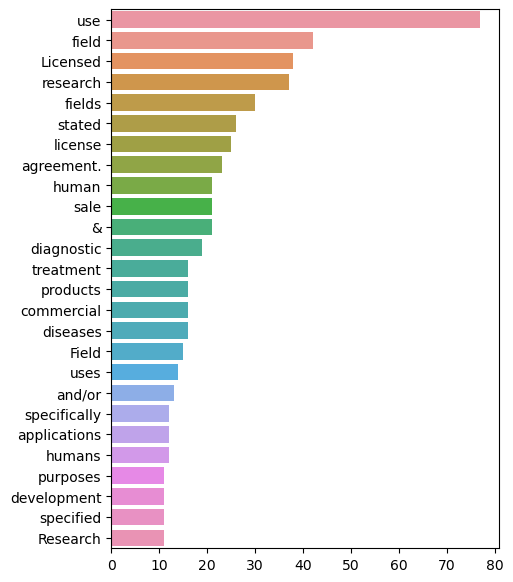

In [108]:
counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:40]:
    if (word.lower() not in stop):
        x.append(word)
        y.append(count)

plt.figure(figsize=(5,7))        
sns.barplot(x=y,y=x)

In [109]:
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngram(corpus,n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit((corpus))
    bag_of_words = vec.transform((corpus))
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
            for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

<AxesSubplot: >

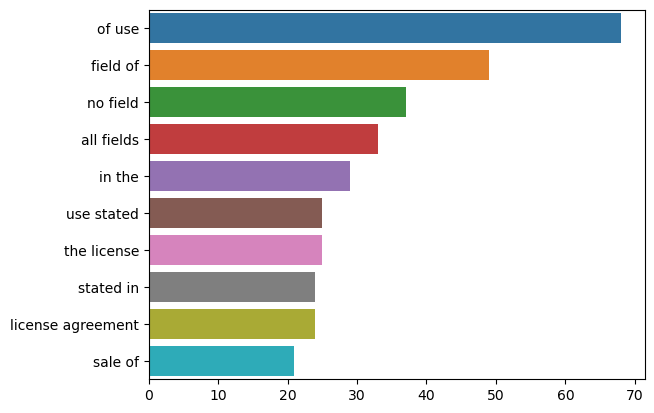

In [111]:
top_n_bigrams=get_top_ngram(term['Field Of Use'].dropna(),2)[:10] 
x,y=map(list,zip(*top_n_bigrams)) 
sns.barplot(x=y,y=x)

In [113]:
import nltk
from nltk import word_tokenize, PorterStemmer, WordNetLemmatizer, punkt, wordnet
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ambro\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ambro\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ambro\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [114]:
def preprocess(section):
    corpus= []
    stem=PorterStemmer()
    lem=WordNetLemmatizer()
    for chunk in section:
        words=[w for w in word_tokenize(chunk) if (w not in stop)]
        words=[lem.lemmatize(w) for w in words if len(w)>2]
        corpus.append(words)
    return corpus

corpus=preprocess(term['Field Of Use'].dropna())

In [117]:
import gensim

dic=gensim.corpora.Dictionary(corpus)
bow_corpus = [dic.doc2bow(doc) for doc in corpus]

In [118]:
#LDA Modeling

lda_model = gensim.models.LdaMulticore(bow_corpus, 
num_topics = 4, 
id2word = dic,                                    
passes = 10,
workers = 2)

lda_model.show_topics()

[(0,
  '0.039*"Licensed" + 0.030*"research" + 0.026*"use" + 0.023*"human" + 0.023*"diagnostic" + 0.021*"product" + 0.019*"sale" + 0.017*"purpose" + 0.017*"therapeutic" + 0.015*"All"'),
 (1,
  '0.077*"use" + 0.070*"field" + 0.066*"stated" + 0.063*"license" + 0.059*"agreement" + 0.019*"human" + 0.016*"cancer" + 0.011*"Field" + 0.011*"gene" + 0.009*"treatment"'),
 (2,
  '0.068*"All" + 0.052*"field" + 0.040*"use" + 0.029*"research" + 0.019*"reagent" + 0.017*"performance" + 0.012*"product" + 0.012*"Fields" + 0.012*"Military" + 0.011*"commercial"'),
 (3,
  '0.042*"use" + 0.037*"field" + 0.032*"human" + 0.029*"specified" + 0.020*"disease" + 0.017*"therapeutic" + 0.016*"application" + 0.011*"product" + 0.011*"disorder" + 0.009*"method"')]

In [120]:
import pyLDAvis
import pyLDAvis.gensim_models
from importlib import reload

In [122]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, bow_corpus, dic)
vis

c:\Users\ambro\anaconda3\envs\my-env\lib\site-packages\pyLDAvis\_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.134598 -0.043315       1        1  46.470552
3      0.026188 -0.088966       2        1  19.471478
2     -0.040889  0.122246       3        1  18.350979
1      0.149299  0.010035       4        1  15.706991, topic_info=            Term       Freq      Total Category  logprob  loglift
61        stated  17.000000  17.000000  Default  30.0000  30.0000
60       license  17.000000  17.000000  Default  29.0000  29.0000
59     agreement  15.000000  15.000000  Default  28.0000  28.0000
91           All  35.000000  35.000000  Default  27.0000  27.0000
57         field  55.000000  55.000000  Default  26.0000  26.0000
..           ...        ...        ...      ...      ...      ...
9    diagnostics   0.931287   8.752265   Topic4  -5.6359  -0.3894
235         Gene   0.828821   2.199274   Topic4  -5.7525   0.8752
17     Agreement   0.823690   2.067130   Topic4  -5.7587   0.9309
333      protein   0.823619   2.200869   Topic4  -5.7588   0.8682
49       limited   0.823614   2.910544   Topic4  -5.7588   0.5887

[231 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
90        2  0.356226       ....
90        3  0.712451       ....
450       3  0.709900   20134452
534       4  0.725438        ALL
17        3  0.483762  Agreement
...     ...       ...        ...
478       2  0.934687     useful
307       2  0.934687      using
417       2  0.699383      virus
16        1  0.926359      vitro
434       1  0.845612     within

[254 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 3, 2])

**Email Sentiment Analysis**

In [415]:
remarks = pd.read_csv('Agreement_remarks.csv')
agreement_ids = pd.read_csv('agreement_ids.csv')
remarks.columns,agreement_ids.columns

(Index(['AGRMNTID', 'AGREEMENTTITLE', 'REMARKDT', 'RCVDDATE', 'AUTHOR', 'TYPE',
        'SUBJECT', 'REMARKPLAINSHORT', 'REMARKPLAINFULL'],
       dtype='object'),
 Index(['Agreement ID', 'Status'], dtype='object'))

In [416]:
remarks.head()

,AGRMNTID,AGREEMENTTITLE,REMARKDT,RCVDDATE,AUTHOR,TYPE,SUBJECT,REMARKPLAINSHORT,REMARKPLAINFULL
0,23-A-045,"4SR Biosciences, Exclusive Option Agreement, 2...",1/22/2023,1/22/2023,Leslie Williams (leslie.williams@hcbioscience....,I,hC Bioscience //UChicago License,"Dear Ken, We are thrilled to move forward with...","Dear Ken,\n\n \n\nWe are thrilled to move forw..."
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,23-A-045,"4SR Biosciences, Exclusive Option Agreement, 2...",1/23/2023,1/23/2023,Kenneth Onishi,I,Re: hC Bioscience //UChicago License,Dear Leslie: Congrats on the wonderful announc...,Dear Leslie:\n\nCongrats on the wonderful anno...
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [417]:
len(remarks)

196

In [418]:
remarks['AGRMNTID'].unique()

array(['23-A-045', nan, '23-A-063', '22-A-227', '11-A-056', '17-A-137',
       '22-A-225', '23-A-048', '05-A-052', '18-A-1296', '21-A-048',
       '15-A-371', '23-A-023', '07-A-011', '21-A-123', '23-A-098',
       '21-A-033', '21-A-120'], dtype=object)

In [419]:
remarks.isna().sum()

#lots of empty columns, we will go ahead and drop them

AGRMNTID            168
AGREEMENTTITLE      168
REMARKDT            168
RCVDDATE            168
AUTHOR              168
TYPE                168
SUBJECT             168
REMARKPLAINSHORT    168
REMARKPLAINFULL     169
dtype: int64

In [420]:
remarks[remarks['AGRMNTID'].isna()]

,AGRMNTID,AGREEMENTTITLE,REMARKDT,RCVDDATE,AUTHOR,TYPE,SUBJECT,REMARKPLAINSHORT,REMARKPLAINFULL
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [421]:
remarks.drop(remarks[remarks['REMARKPLAINFULL'].isna()].index, inplace=True)
len(remarks),remarks['AGRMNTID'].unique()

(27,
 array(['23-A-045', '23-A-063', '22-A-227', '11-A-056', '17-A-137',
        '22-A-225', '23-A-048', '05-A-052', '18-A-1296', '21-A-048',
        '15-A-371', '23-A-023', '07-A-011', '21-A-123', '23-A-098',
        '21-A-033', '21-A-120'], dtype=object))

In [422]:
remarks = remarks.reset_index(inplace=False)

In [423]:
agreement_ids['Agreement ID']=agreement_ids['Agreement ID'].astype('string')
remarks['AGRMNTID']= remarks['AGRMNTID'].astype('string')
remarks['REMARKPLAINFULL']= remarks['REMARKPLAINFULL'].astype('string')


In [424]:

#cleaning agreement id's


ids = agreement_ids['Agreement ID']
temp=[]
for id in ids:
    temp = np.append(temp,id.strip())

agreement_ids['Agreement ID'] = temp


ids = remarks['AGRMNTID']
temp=[]
for id in ids:
    adjustment = id.strip()
    temp = np.append(temp,id.strip())

remarks['AGRMNTID'] = temp


In [425]:
remarks['AGRMNTID'].unique()

#all 18 unique id's

array(['23-A-045', '23-A-063', '22-A-227', '11-A-056', '17-A-137',
       '22-A-225', '23-A-048', '05-A-052', '18-A-1296', '21-A-048',
       '15-A-371', '23-A-023', '07-A-011', '21-A-123', '23-A-098',
       '21-A-033', '21-A-120'], dtype=object)

In [426]:
remarks = pd.merge(remarks, agreement_ids, left_on='AGRMNTID', right_on='Agreement ID',how='left')

In [427]:
remarks['AGRMNTID'].unique()

array(['23-A-045', '23-A-063', '22-A-227', '11-A-056', '17-A-137',
       '22-A-225', '23-A-048', '05-A-052', '18-A-1296', '21-A-048',
       '15-A-371', '23-A-023', '07-A-011', '21-A-123', '23-A-098',
       '21-A-033', '21-A-120'], dtype=object)

In [428]:
remarks = remarks.drop('index',axis='columns',inplace=False)

In [507]:
remarks.rename(columns = {"REMARKPLAINFULL":"fullremark"},inplace=True)

In [508]:
#Let's examine some full email text
test_clean = remarks['fullremark'][0]
test_clean

'Dear Ken, We are thrilled to move forward with our continued partnership now that the hCBio/4SR Acquisition is completed.    Please let us know the next steps to move forward with the license for the technologies developed by Drs. Pan and Katanski at the University of Chicago! Looking forward to working with you on this.Best,Leslie  Leslie J WilliamsCo-Founder, President & CEOhC Bioscience125 Cambridgepark DriveCambridge, MA  02142M: 617-515-6755   '

In [509]:
string = test_clean.replace('\n',"")
string

'Dear Ken, We are thrilled to move forward with our continued partnership now that the hCBio/4SR Acquisition is completed.    Please let us know the next steps to move forward with the license for the technologies developed by Drs. Pan and Katanski at the University of Chicago! Looking forward to working with you on this.Best,Leslie  Leslie J WilliamsCo-Founder, President & CEOhC Bioscience125 Cambridgepark DriveCambridge, MA  02142M: 617-515-6755   '

In [510]:
#Replacing all remarks 
clean = []
text_data = remarks['fullremark']
for i in text_data:
    new_i = i.replace('\n',"")
    clean = np.append(clean,new_i)

remarks['fullremark'] = clean

In [511]:
remarks['fullremark'][0]

#let's remove the notice at the end as it may skew results 

'Dear Ken, We are thrilled to move forward with our continued partnership now that the hCBio/4SR Acquisition is completed.    Please let us know the next steps to move forward with the license for the technologies developed by Drs. Pan and Katanski at the University of Chicago! Looking forward to working with you on this.Best,Leslie  Leslie J WilliamsCo-Founder, President & CEOhC Bioscience125 Cambridgepark DriveCambridge, MA  02142M: 617-515-6755   '

In [512]:
clean = []
text_data = remarks['fullremark']
for i in text_data:
    new_i = i.replace('IMPORTANT NOTICE: This e-mail, including any attachments, may contain privileged, confidential, and/or proprietary information, and is intended only to be seen and used by the named addressee(s). If you are not the intended recipient of this e-mail, you are notified that any discussion, distribution or copying of this e-mail, and any attachments, is strictly prohibited. If you have received this e-mail in error, please notify the sender immediately, and permanently delete the original and any copies of the e-mail, any attachments, and any printout without reading, distributing or copying them.',"")
    clean = np.append(clean,new_i)

remarks['fullremark'] = clean

In [513]:
remarks['Status'].value_counts()

In Negotiation    13
Active             9
Amended            3
Expired            2
Name: Status, dtype: int64

In [514]:
remarks.dtypes

AGRMNTID            object
AGREEMENTTITLE      object
REMARKDT            object
RCVDDATE            object
AUTHOR              object
TYPE                object
SUBJECT             object
REMARKPLAINSHORT    object
fullremark          object
Agreement ID        object
Status              object
dtype: object

In [515]:
remarks['fullremark']= remarks['fullremark'].astype('string')

In [516]:
active_remarks = remarks[remarks['Status']=='Active'].reset_index()
in_negotiation_remarks = remarks[remarks['Status']=='In Negotiation'].reset_index()

In [517]:
active_remarks['fullremark']=active_remarks['fullremark'].astype('string')
in_negotiation_remarks['fullremark']= in_negotiation_remarks['fullremark'].astype('string')

<AxesSubplot: >

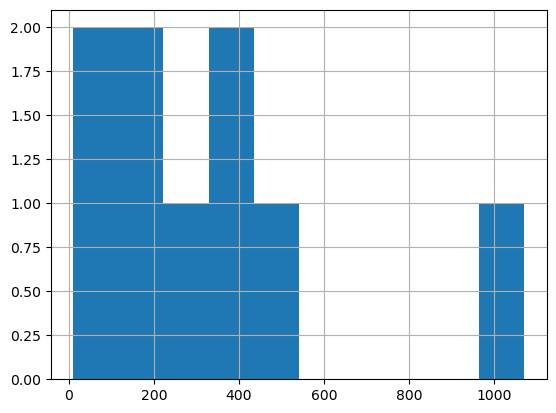

In [438]:
active_remarks['fullremark'].str.split().map(lambda x: len(x)).hist()

<AxesSubplot: >

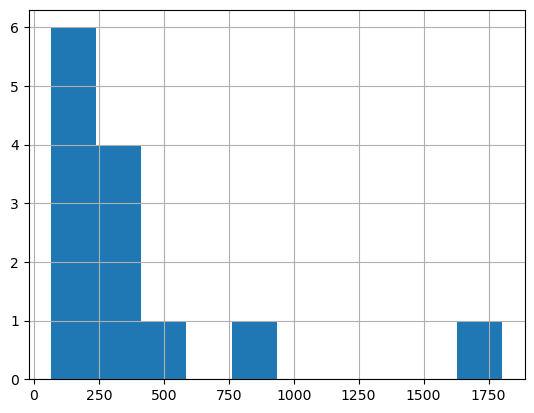

In [439]:
in_negotiation_remarks['fullremark'].str.split().map(lambda x: len(x)).hist()

In [440]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [441]:
%pip install spacytextblob

Note: you may need to restart the kernel to use updated packages.


In [442]:
from spacytextblob.spacytextblob import SpacyTextBlob

In [443]:
nlp.add_pipe('spacytextblob')

In [611]:
#assign active information

active = remarks['fullremark']
active.head()

0    Dear Ken, We are thrilled to move forward with...
1    Dear Leslie:Congrats on the wonderful announce...
2    Hi Ken,Fantastic!  We will be on the look out ...
3    Thelma and Mario,  Getting close to sending ov...
4    Staying expired. Moving to license negotiation...
Name: fullremark, dtype: string

In [612]:
import re

In [613]:
def re_gex(my_string,expression):
    txt= my_string
    x = re.findall(expression, txt)
    return x

match_list=[]
for i in active:
    my_string = i
    matches=re_gex(my_string,r"<.+Subject:\s")
#    print(matches)

In [614]:
# All of that looks like it can be removed
def string_clean(my_string,expression):
    txt= my_string
    x = re.sub(expression,"", txt)
    return x


match_list=[]
for i in active:
    my_string = i
    matches=string_clean(my_string,r"<.+Subject:\s")
    match_list.append(matches)

#match_list

In [615]:
active=match_list

In [616]:
#Round 2

for i in active:
    my_string = i
    matches=re_gex(my_string,r"<http.+>")
#    print(matches)


In [617]:
#Goodbye!
match_list=[]
for i in active:
    my_string = i
    matches=string_clean(my_string,r"<http.+>")
    match_list.append(matches)

#match_list

In [618]:
active=match_list

In [619]:
#Third and final cleaning round

for i in active:
    my_string = i
    matches=re_gex(my_string,r"<mailto.+>")
    print(matches)

match_list=[]
for i in active:
    my_string = i
    matches=string_clean(my_string,r"<mailto.+>")
    match_list.append(matches)

active=match_list

[]
[]
[]
['<mailto:danesmith@uchicago.edu>']
['<mailto:tstocco@uchicago.edu>']
['<mailto:tstocco@uchicago.edu>']
['<mailto:tstocco@uchicago.edu>']
['<mailto:tstocco@uchicago.edu>']
[]
[]
[]
['<mailto:LABFINSUP@mayo.edu>']
[]
['<mailto:tstocco@uchicago.edu>']
['<mailto:kgonishi@uchicago.edu>']
['<mailto:tstocco@uchicago.edu>']
['<mailto:tstocco@uchicago.edu>']
['<mailto:tstocco@uchicago.edu>']
['<mailto:Shohei.Koide@nyulangone.org> > wrote:\ufeff All, I will not be available next week. I will be available Monday June 13, 2-4pm. I have limited availability in the rest of the week of June 13.Best regards,Shohei On Jun 2, 2022, at 12:25 PM, Heather Bakalyar <hbakalyar@uchicago.edu <mailto:hbakalyar@uchicago.edu> > wrote: [EXTERNAL]Hello all, My apologies, I need to cancel our meeting today. How are people’s calendar for next week? Best,Heather HEATHER BAKALYAR, Ph.D., M.B.A., Patent AgentTemp Principal Consultant., Intellectual Property and Technology DevelopmentPolsky Center for Entrepren

In [620]:
len(active),active

(27,
 ['Dear Ken, We are thrilled to move forward with our continued partnership now that the hCBio/4SR Acquisition is completed.    Please let us know the next steps to move forward with the license for the technologies developed by Drs. Pan and Katanski at the University of Chicago! Looking forward to working with you on this.Best,Leslie  Leslie J WilliamsCo-Founder, President & CEOhC Bioscience125 Cambridgepark DriveCambridge, MA  02142M: 617-515-6755   ',
  "Dear Leslie:Congrats on the wonderful announcement at JPM!! We're very excited to see the future of your joined forces! For the next steps of the license agreement, we'll share a draft for your review in short order. Once drafted, I'll send this over for your team's redlines and comments. We are also looking forward to working with you on this! With thanks,KenKENNETH GAYOSA ONISHI, PH.D.Associate Manager, Business Development and Licensing - MicrobiomePolsky Center for Entrepreneurship and Innovation I THE UNIVERSITY OF CHICAGO

In [621]:
#Sentiment Analysis

sent_labels=[]
sent_scores = []
total_pos=[]
total_neg=[]

output =[]
for i in active:
    my_string = i.lower()
    my_string = my_string.strip().replace("  ","")
    output.append(my_string)

for i in output:
    my_string = i
    doc=nlp(my_string)
    sentiment = doc._.blob.polarity
    
    sentiment = round(sentiment,2)
        
    if sentiment > 0:
        sent_label = "Positive"
    else:
        sent_label = "Negative"

    sent_labels.append(sent_label)
    sent_scores.append(sentiment)

    positive_words = []
    negative_words = []

    for x in doc._.blob.sentiment_assessments.assessments:
        if x[1] > 0:
            positive_words.append(x[0][0])
        elif x[1] < 0:
            negative_words.append(x[0][0])
        else:
            pass

    total_pos.append(', '.join(set(positive_words)))
    total_neg.append(', '.join(set(negative_words)))


In [624]:
df = pd.DataFrame(
    {'Status':remarks['Status'],'Text':output,'Sentiment Score':sent_scores,
    'Sentiment Label': sent_labels,
    'Positive Words':total_pos,'Negative Words':total_neg}
)
df

,Status,Text,Sentiment Score,Sentiment Label,Positive Words,Negative Words
0,In Negotiation,"dear ken, we are thrilled to move forward with...",0.24,Positive,"thrilled, developed",
1,In Negotiation,dear leslie:congrats on the wonderful announce...,0.23,Positive,"wonderful, very, thrilled, developed",center
2,In Negotiation,"hi ken,fantastic!we will be on the look out fo...",0.26,Positive,"exciting, thrilled, developed",
3,In Negotiation,"thelma and mario,getting close to sending over...",0.07,Positive,thanks,center
4,Expired,staying expired. moving to license negotiation...,-0.10,Negative,,center
5,Active,thanks teana. they sent an email to our inbox ...,0.13,Positive,"generally, sure, thanks","few, center"
6,Expired,"thank you, teana, and i am sorry that was not ...",-0.09,Negative,early,"not, sorry, center"
7,Amended,"you should… in the last financial meeting, the...",0.02,Positive,latest,"usual, center"
8,Active,do you want this kind of stuff per the tharzen...,0.15,Positive,"kind, good, more, ready, right, action, meanin...","tough, center, expected, game"
9,In Negotiation,"tt and ben,have a look at this latest draft pr...",0.10,Positive,"latest, effective, legal, thanks, success","common, hard, other, due"
